In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\nandi\Documents\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#checking for any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{}-{}%".format(col, pct_missing*100))

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.02608242044861763%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-28.31246739697444%
gross-2.464788732394366%
company-0.2217005738132499%
runtime-0.05216484089723526%


In [5]:
#data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#change data type of columns
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [9]:
df=df.sort_values(by=['gross'], inplace = False, ascending = False)

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
#drop null values
df = df.dropna()

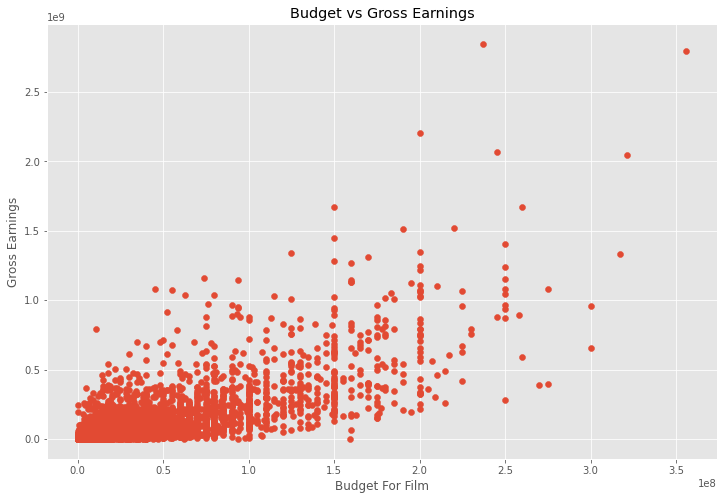

In [12]:
#scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget For Film')

plt.ylabel('Gross Earnings')

plt.show()

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [14]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


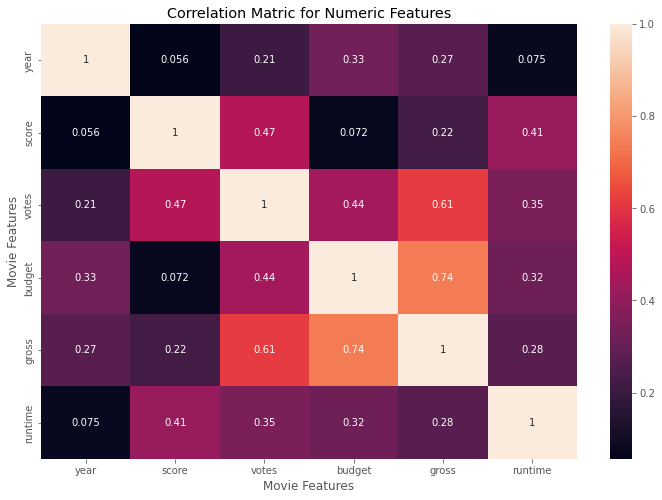

In [15]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [35]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


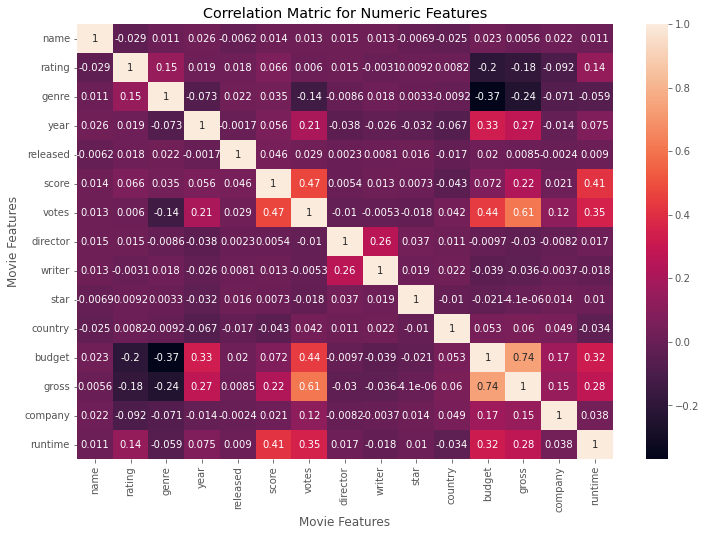

In [22]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [36]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      year        0.025542
      released   -0.006152
dtype: float64

In [37]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.368523
genre   budget   -0.368523
        gross    -0.244101
gross   genre    -0.244101
budget  rating   -0.203946
dtype: float64

In [28]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [29]:
# Top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64

In [30]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company year            
0       2003    44350926
1       2019   193457467
2       1996       10580
3       1996   129832389
        1999    87423861
4       1983    12232628
5       2003     4928883
6       2017    40656399
7       2014    58834384
8       2002      264349
9       2019   122810399
10      2007    22783978
11      2004    69424389
12      2020   111105497
13      2014    41296320
        2018    41142379
14      1990     5835247
15      1994     1702394
16      2002    23932055
17      2009    20458873
18      2007     7248490
        2008    28705178
        2014     5092129
19      2016      678150
        2018   197744377
20      1996    60209334
        1997    75812433
        2001    71186502
        2010      649626
        2013     3909596
        2014   161459297
        2015    36606743
        2019    22386555
21      1999     8408835
22      2017     5042014
23      2007     9669758
24      2001     4760014
25      1999   133949270
26      1986     7137502
        1989    37295445
        1995    15403436
        1999    34573780
        2000    27728118
        2004     1526951
27      2007    95802916
28      1999      206128
29      2000     3033646
30      1990    10005969
31      1990   201965915
32      2003     5141166
33      2002    80693537
34      1995     3734870
        1996       49620
        2002    14946150
35      1984     1455045
        1988      161004
        1992     1526697
        1993     1677807
36      2014    36869414
        2016    72551409
        2018    23650455
        2019    47967636
37      1983    35615609
        1984     2773433
        1986     9697739
38      1990      349618
39      2016    39712000
        2017    53939297
40      2005    12693645
41      1989       67878
42      1984    52066791
        1998     1263279
43      2013    17496820
44      2014    25419147
45      1980    21448782
        1981    25244626
46      2012     5277766
47      2000   224834564
        2005   194137091
        2006   178281554
48      1989     3169719
49      1987     3685862
50      2008    87066930
51      2013     1456675
52      2012   116471580
53      1988     4192440
54      2017    43980821
55      2018   117679066
56      1987    30902642
        1989     1877618
57      2012     1386088
58      2011     3242802
59      1983    17488564
60      1996      749741
        1997    12782749
61      1992     5378172
62      2019    38026103
63      2013    11806432
64      1997      127923
65      2013   181769347
66      1994      763847
67      1999     6552255
        2000    35547761
        2001     1198113
        2002   113758770
        2004    12313323
        2005   132768353
        2006    65664721
        2007   156835339
        2008    90200168
        2009   309208309
        2010   157107755
        2011   161043822
        2012    38390020
        2013   182178825
        2014   106435603
        2015   161690734
        2017   284935792
        2018    67450815
68      1992     9569275
        1993    46768542
        1995    23440188
69      2014    87835664
70      2012     7029095
71      2018    38755900
72      1987    14182492
        1988    13008928
        1989    16554699
        1991     1193062
73      1988    57041866
        1991    23202444
        2002    73839240
74      1997    14772788
75      2005    29612137
76      1989     4973285
77      2012     1544989
78      1997     2804473
        2001    12881605
        2002     6413915
        2003     1271244
79      1996     2671291
80      2013    27858103
81      1992    58124215
        1993    20915465
82      1995    10382407
83      1989     1919653
        1992    32100816
84      2015   542358331
85      2017    61621140
        2019     6750029
86      2015     2333684
87      1982     2032311
88      1984       95000
89      2002    12150301
90      2012    15950164
91      2000    20908467
92      2001     1846059
93      2000    34266564
94      2015      6